https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification

In [2]:
!nvidia-smi

Fri Dec  5 15:18:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             29W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/apples-or-tomatoes-image-classification


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization, Dropout

## Data Loader

In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/apples-or-tomatoes-image-classification/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/apples-or-tomatoes-image-classification/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 294 files belonging to 2 classes.


I0000 00:00:1764948093.573544      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 97 files belonging to 2 classes.


# Normalization

In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Lets define our custom architecture

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50


I0000 00:00:1764948172.317321     124 service.cc:148] XLA service 0x7ec338013d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764948172.318013     124 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764948172.945982     124 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5306 - loss: 7.9603

I0000 00:00:1764948178.596153     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 705ms/step - accuracy: 0.5425 - loss: 8.8562 - val_accuracy: 0.5464 - val_loss: 0.7820
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6519 - loss: 3.2323 - val_accuracy: 0.5670 - val_loss: 3.3285
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7374 - loss: 1.9332 - val_accuracy: 0.5876 - val_loss: 2.9799
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7497 - loss: 2.7143 - val_accuracy: 0.5464 - val_loss: 6.4806
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8042 - loss: 2.0448 - val_accuracy: 0.5567 - val_loss: 4.2397
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8044 - loss: 3.1269 - val_accuracy: 0.5567 - val_loss: 10.6107
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7583 - loss: 1.9604 - val_accuracy: 0.5567 - val_loss: 15.3015
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8364 - loss: 1.7037 - val_accuracy: 0.5670 - val_loss

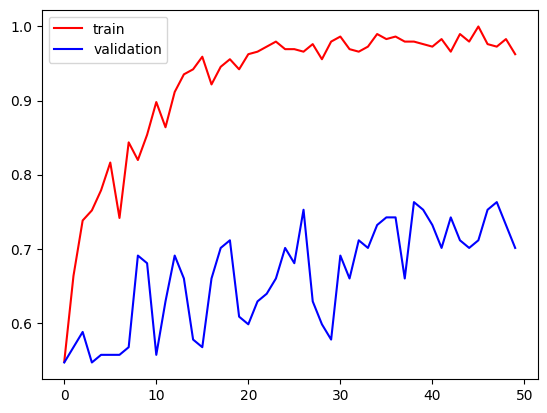

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

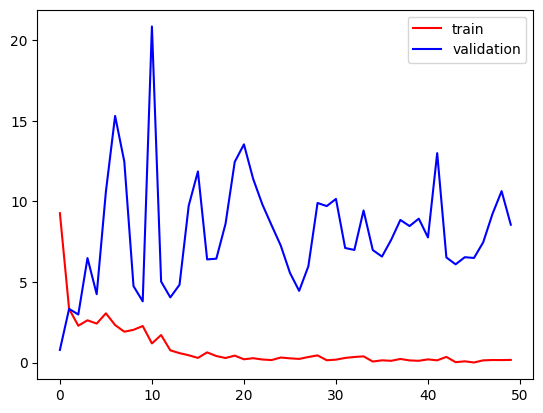

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## ways to reduce overfitting
- Add more data
- Data Augmentation
- Dropout
- Batch Norm
- Reduce complexity

# Inference

In [19]:
import cv2

test_img = cv2.imread("/kaggle/input/apples-or-tomatoes-image-classification/test/apples/img_p1_127.jpeg")
test_img

array([[[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       ...,

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]]

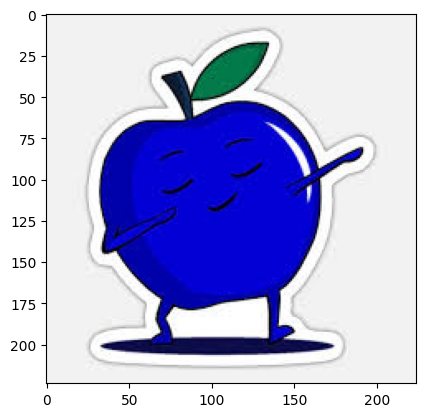

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(224, 224, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_img.shape

(256, 256, 3)

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
result = model.predict(test_input)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


array([[0.]], dtype=float32)

In [26]:
if int(result[0][0]) == 0:
  print("Apple")

else:
  print("Tomato")

Apple


apple - 0

tomatoes - 1